In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statistics import mean, stdev, median
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
#initial configuration:

lacuna_de_dias = 14
feature_engineering_option = 'FULL'

# Initial Treatment (3,7,14)

In [ ]:
def column_y_creator(df, days_after):
    list_of_movement = []

    for i in range(len(df)):
        try:
            if df['close'].iloc[i] < df['close'].iloc[i + days_after]:
                list_of_movement.append(1)
            elif df['close'].iloc[i] > df['close'].iloc[i + days_after]:
                list_of_movement.append(0)
        except IndexError:
            # Add NaNs to fill the missing space
            list_of_movement.append(np.nan)

    # Ensures that the length of the track is the same as that of the DataFrame
    while len(list_of_movement) < len(df):
        list_of_movement.append(np.nan)

    return list_of_movement

In [ ]:
df = pd.read_csv('/content/df_onchain_rsi_rainbow_2013_2025.csv')

df = df.rename(columns={'Date': 'timestamp'})

In [ ]:
#inner_join_dataframe
df['price_movement_3'] = column_y_creator(df,3)
df['price_movement_7'] = column_y_creator(df,7)
df['price_movement_14'] = column_y_creator(df,14)

In [ ]:
df.tail()

,open,high,low,close,volume,marketCap,timestamp,rainbow_class,RSI,Weight Mean,...,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,price_movement_3,price_movement_7,price_movement_14
4234,97580.490583,97725.597303,96060.979753,96175.032040,1.653676e+10,1.906780e+12,2025-02-17,🟡 Hold,40.268305,3.911441e+06,...,305170.939094,333466,312393,1199172,883587,594109.4195,137,1.0,NaN,NaN
4235,96179.004565,97032.238254,95243.543192,95773.384187,2.733655e+10,1.898794e+12,2025-02-18,🟡 Hold,38.233129,3.994308e+06,...,303253.346204,422709,400770,1145100,1108101,451530.9044,140,NaN,NaN,NaN
4236,95773.816243,96695.378400,93388.832201,95539.543603,3.732572e+10,1.894092e+12,2025-02-19,🟡 Hold,36.977676,3.993898e+06,...,302595.774799,448569,426673,918371,1172985,490080.1899,126,NaN,NaN,NaN
4237,95532.532146,96855.597220,95011.969077,96635.613212,2.899087e+10,1.915897e+12,2025-02-20,🟡 Hold,46.482102,3.994287e+06,...,305591.480292,480465,456925,913155,1288055,516048.6880,130,NaN,NaN,NaN
4238,96632.679187,98767.193736,96442.670721,98333.937829,3.166802e+10,1.949797e+12,2025-02-21,🟡 Hold,57.847513,3.994001e+06,...,312046.950101,459909,435575,917730,1255016,557128.3038,129,NaN,NaN,NaN


In [ ]:
df.describe()

,open,high,low,close,volume,marketCap,RSI,Weight Mean,Difficulty Mean,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,price_movement_3,price_movement_7,price_movement_14
count,4239.000000,4239.000000,4239.000000,4239.000000,4.239000e+03,4.239000e+03,4239.000000,4.239000e+03,4.239000e+03,4239.000000,4239.000000,4239.000000,4.239000e+03,4.239000e+03,4.239000e+03,4239.000000,4235.000000,4230.000000,4224.000000
mean,17903.393592,18303.043726,17485.712498,17923.532389,1.585873e+10,3.420175e+11,53.542790,2.938468e+06,1.978034e+13,115502.998577,259945.141071,141688.524180,6.487621e+05,7.212974e+05,9.568276e+05,151.270347,0.541204,0.543735,0.556818
std,23486.635296,23990.948513,22966.936064,23516.958916,2.028748e+10,4.606168e+11,18.238262,1.138684e+06,2.830535e+13,116092.927318,145133.607282,172530.583703,3.029557e+05,3.777558e+05,2.499461e+06,18.298764,0.498358,0.498142,0.496820
min,29.807757,31.557894,24.897924,29.815993,0.000000e+00,3.226988e+08,5.664477,3.045951e+05,3.651012e+06,753.466429,30356.000000,0.000000,6.728400e+04,7.709400e+04,1.271966e+03,58.000000,0.000000,0.000000,0.000000
25%,587.502502,597.731995,577.073975,588.285522,5.556110e+07,7.863335e+09,40.276602,2.321600e+06,1.133543e+11,11436.469215,173009.000000,0.000000,4.630635e+05,4.844205e+05,1.688725e+04,140.000000,0.000000,0.000000,0.000000
50%,7274.799428,7427.385794,7101.520020,7275.155728,7.714767e+09,1.286821e+11,51.845371,3.317137e+06,6.353031e+12,84043.925169,260101.000000,100572.000000,6.752490e+05,7.287490e+05,2.655994e+05,150.000000,1.000000,1.000000,1.000000
75%,28846.791753,29338.439623,28290.291638,28876.167770,2.618900e+10,5.545189e+11,66.042883,3.945714e+06,2.794125e+13,187747.162287,323878.000000,212577.000000,8.633705e+05,9.079665e+05,7.364526e+05,161.000000,1.000000,1.000000,1.000000
max,106147.295260,109114.884834,105291.737868,106146.263007,3.509679e+11,2.102916e+12,99.918062,3.995786e+06,1.141673e+14,819092.831490,927010.000000,917239.000000,1.751024e+06,2.521252e+06,8.033406e+07,260.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,rainbow_class,RSI,Weight Mean,...,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,price_movement_3,price_movement_7,price_movement_14
0,30.264164,32.711009,24.897924,29.815993,24294.73,3.226988e+08,2013-02-25,🔥 Fire Sale,13.138938,599223.627451,...,753.466429,67144,0,142368,153264,1982.1967,204,1.0,1.0,1.0
1,29.807757,31.557894,25.340373,30.356947,26825.02,3.287089e+08,2013-02-26,🔥 Fire Sale,59.259382,699079.253012,...,761.300742,63438,0,135802,146211,1709.9491,166,1.0,1.0,1.0
2,30.372301,35.587974,27.774453,30.620127,42947.29,3.316856e+08,2013-02-27,🔥 Fire Sale,68.614316,583343.875648,...,782.496439,60949,0,130979,143148,1688.0903,193,1.0,1.0,1.0
3,30.587812,33.705288,25.487420,31.051743,30493.42,3.365112e+08,2013-02-28,🔥 Fire Sale,78.121065,694657.761905,...,788.231780,63021,0,135539,147950,1886.9545,168,1.0,1.0,1.0
4,30.919420,34.707659,26.029683,32.028154,126830.64,3.472272e+08,2013-03-01,🔥 Fire Sale,87.781561,786482.236842,...,831.367254,64535,0,139561,151654,2221.9285,152,1.0,1.0,1.0


In [ ]:
df.tail()

,open,high,low,close,volume,marketCap,timestamp,rainbow_class,RSI,Weight Mean,...,Reward Mean,Transaction Sum,Witness Sum,Input Sum,Output Sum,Fee Total Sum,Total Blocks,price_movement_3,price_movement_7,price_movement_14
4234,97580.490583,97725.597303,96060.979753,96175.032040,1.653676e+10,1.906780e+12,2025-02-17,🟡 Hold,40.268305,3.911441e+06,...,305170.939094,333466,312393,1199172,883587,594109.4195,137,1.0,NaN,NaN
4235,96179.004565,97032.238254,95243.543192,95773.384187,2.733655e+10,1.898794e+12,2025-02-18,🟡 Hold,38.233129,3.994308e+06,...,303253.346204,422709,400770,1145100,1108101,451530.9044,140,NaN,NaN,NaN
4236,95773.816243,96695.378400,93388.832201,95539.543603,3.732572e+10,1.894092e+12,2025-02-19,🟡 Hold,36.977676,3.993898e+06,...,302595.774799,448569,426673,918371,1172985,490080.1899,126,NaN,NaN,NaN
4237,95532.532146,96855.597220,95011.969077,96635.613212,2.899087e+10,1.915897e+12,2025-02-20,🟡 Hold,46.482102,3.994287e+06,...,305591.480292,480465,456925,913155,1288055,516048.6880,130,NaN,NaN,NaN
4238,96632.679187,98767.193736,96442.670721,98333.937829,3.166802e+10,1.949797e+12,2025-02-21,🟡 Hold,57.847513,3.994001e+06,...,312046.950101,459909,435575,917730,1255016,557128.3038,129,NaN,NaN,NaN


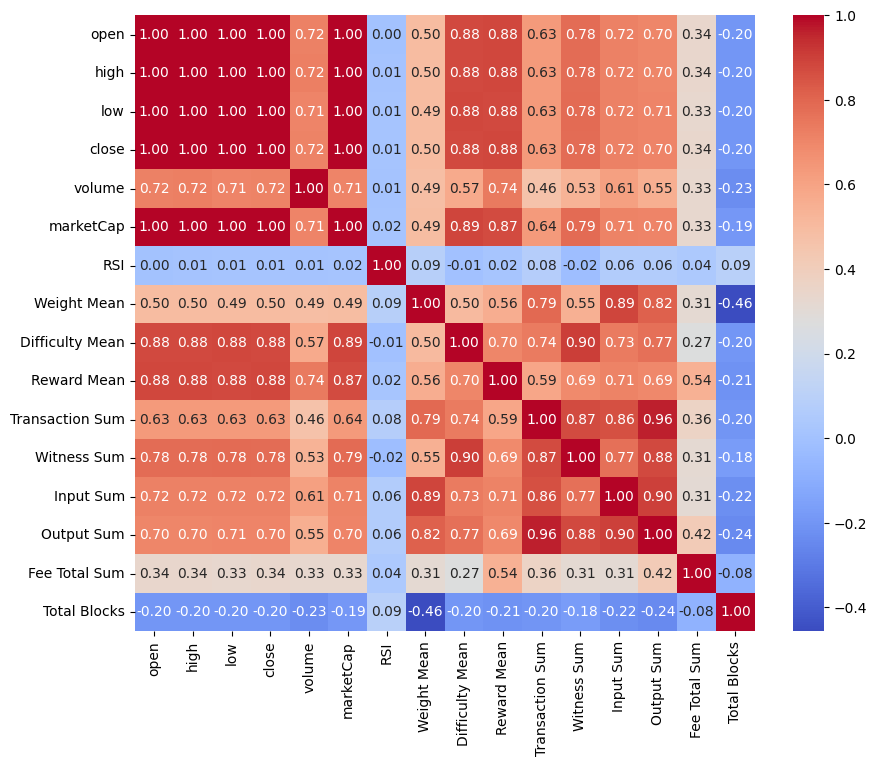

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copying and adjusting the DataFrame
df_corr = df.copy()

# Delete categorical parameters
df_corr = df_corr.drop(['timestamp', 'rainbow_class', 'price_movement_3', 'price_movement_7', 'price_movement_14'], axis=1)

# Create the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the chart size if necessary
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# View the chart
plt.show()

# Mobile Standardization - Validation and testing included

In [ ]:
consecutive_sequences = []
counter = 0
for i in range(len(df)):
  try:
      if df['rainbow_class'].iloc[i] == df['rainbow_class'].iloc[i+1]:
          counter += 1
      else:
          consecutive_sequences.append(counter)
          counter = 0
  except:
    pass

In [ ]:
consecutive_sequences.sort()
print(consecutive_sequences)
print(mean(consecutive_sequences))
print(stdev(consecutive_sequences))
print(median(consecutive_sequences))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 16, 17, 19, 21, 22, 22, 24, 25, 25, 26, 26, 29, 29, 33, 34, 36, 37, 38, 40, 40, 43, 44, 45, 47, 49, 51, 52, 55, 62, 66, 67, 68, 68, 72, 97, 102, 102, 103, 111, 116, 128, 144, 170, 207, 209, 225, 234, 299]
21.891304347826086
46.27500511978176
3.0


In [ ]:
lista_sem_repetidos = list(set(consecutive_sequences))


mediana = median(lista_sem_repetidos)

print("A mediana é:", mediana)

A mediana é: 37


In [ ]:
# Count the quantity of each class
counts = df['price_movement_14'].value_counts()

# Calculate the proportions
proportions = df['price_movement_14'].value_counts(normalize=True)

print("\nProporção de Classes:")
print(proportions)


Proporção de Classes:
price_movement_14
1.0    0.556818
0.0    0.443182
Name: proportion, dtype: float64


In [ ]:
# Function to apply MinMaxScaler to blocks of 37 records
def scale_in_blocks(df, block_size):
    scaler = MinMaxScaler()
    n = len(df)
    scaled_df = df.copy()

    for start in range(0, n, block_size):
        end = min(start + block_size, n)
        if end - start == block_size:  # Checks if the block is the correct size
            subset = df.iloc[start:end]
            scaled_values = scaler.fit_transform(subset)
            scaled_df.iloc[start:end] = scaled_values

    return scaled_df

In [ ]:
block_size = mediana

if len(df) % block_size != 0:
    df = df.iloc[:len(df)-(len(df) % block_size)]

X_files = df.drop(['timestamp', 'rainbow_class', 'price_movement_3', 'price_movement_7', 'price_movement_14'], axis=1)

# Apply the function
scaled_df = scale_in_blocks(X_files, block_size)

<ipython-input-17-f3604260195d>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.83105126 0.73759992 0.67483672 0.72708475 0.76526212 0.54562877
 0.5111834  0.75288095 0.57192929 0.72050332 0.82162039 0.54643569
 0.53859344 1.         0.63297778 0.36051643 0.5674408  0.60221398
 0.72090678 0.         0.02927604 0.2344605  0.30060267 0.30483899
 0.53904733 0.6656328  0.47222432 0.4324079  0.37335149 0.37506619
 0.47961268 0.67584537 0.70786999 0.63063268 0.24709383 0.46859319
 0.73351489]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  scaled_df.iloc[start:end] = scaled_values
<ipython-input-17-f3604260195d>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.81141259 0.72753634 0.66592576 0.72417669 0.77555504 0.55122506
 0.50045988 0.75311055 0.62236529 0.82265399 0.95066554 

In [ ]:
scaled_df['rainbow_chart'] = df['rainbow_class']
scaled_df['price_movement_3'] = df['price_movement_3']
scaled_df['price_movement_7'] = df['price_movement_7']
scaled_df['price_movement_14'] = df['price_movement_14']

In [ ]:
df_encoded = pd.get_dummies(scaled_df, columns=['rainbow_chart'], dtype=int)

df_encoded.head()

,open,high,low,close,volume,marketCap,RSI,Weight Mean,Difficulty Mean,Reward Mean,...,Total Blocks,price_movement_3,price_movement_7,price_movement_14,rainbow_chart_🔥 Fire Sale,rainbow_chart_🔴 FOMO,rainbow_chart_🚀 Super Bubble!,rainbow_chart_🟠 Sell,rainbow_chart_🟡 Hold,rainbow_chart_🟢 Buy!
0,0.007284,0.014681,0.000000,0.000000,0.069253,0.000000,0.000000,0.569136,0.000000,0.000000,...,0.744898,1.0,1.0,1.0,1,0,0,0,0,0
1,0.000000,0.000000,0.007534,0.007755,0.084088,0.007800,0.536240,0.775566,0.000000,0.004430,...,0.357143,1.0,1.0,1.0,1,0,0,0,0,0
2,0.009009,0.051308,0.048980,0.011528,0.178612,0.011663,0.645009,0.536308,0.000000,0.016416,...,0.632653,1.0,1.0,1.0,1,0,0,0,0,0
3,0.012448,0.027339,0.010038,0.017716,0.105596,0.017926,0.755544,0.766426,0.000000,0.019659,...,0.377551,1.0,1.0,1.0,1,0,0,0,0,0
4,0.017740,0.040100,0.019271,0.031715,0.670417,0.031833,0.867866,0.956253,0.063506,0.044051,...,0.214286,1.0,1.0,1.0,1,0,0,0,0,0


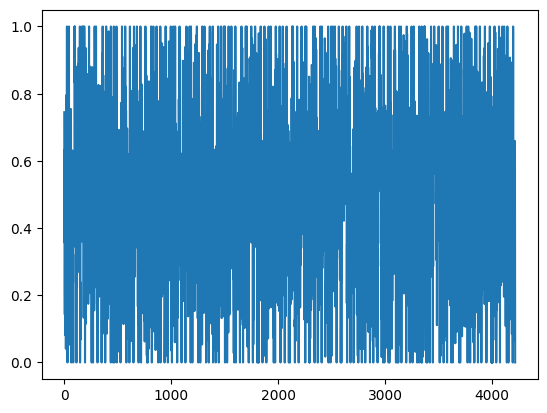

In [ ]:
plt.plot(df_encoded['Total Blocks'])
plt.show()

** Parte de testes e seleção de dias **

In [ ]:
option = lacuna_de_dias

if option == 3:
  column_of_choice = 'price_movement_3'
  df_selected = df_encoded.drop(['price_movement_7', 'price_movement_14'],axis=1)
elif option == 7:
  column_of_choice = 'price_movement_7'
  df_selected = df_encoded.drop(['price_movement_3', 'price_movement_14'],axis=1)
elif option == 14:
  column_of_choice = 'price_movement_14'
  df_selected = df_encoded.drop(['price_movement_3', 'price_movement_7'],axis=1)

In [ ]:
df_selected = df_selected.dropna()

X = df_selected.drop([column_of_choice],axis=1)
y = df_selected[column_of_choice]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#training

kfold = KFold(n_splits=5)

model_svm = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_mlp = MLPClassifier()


result_svm_norm = cross_val_score(model_svm,X,y,cv = kfold)
result_knn_norm = cross_val_score(model_knn,X,y,cv = kfold)
result_rf_norm = cross_val_score(model_rf,X,y,cv = kfold)
result_gb_norm = cross_val_score(model_gb,X,y,cv = kfold)
result_lr_norm = cross_val_score(model_lr,X,y,cv = kfold)
result_dt_norm = cross_val_score(model_dt,X,y,cv = kfold)
result_nb_norm = cross_val_score(model_nb,X,y,cv = kfold)
result_mlp_norm = cross_val_score(model_mlp,X,y,cv = kfold)

all_values_norm = [result_svm_norm, result_knn_norm, result_rf_norm, result_gb_norm, result_lr_norm, result_dt_norm, result_nb_norm, result_mlp_norm]


print(f'SVM: {result_svm_norm.mean()}')
print(f'KNN: {result_knn_norm.mean()}')
print(f'Random Forest: {result_rf_norm.mean()}')
print(f'Gradient Boosting: {result_gb_norm.mean()}')
print(f'Logistic Regression: {result_lr_norm.mean()}')
print(f'Decision Tree: {result_dt_norm.mean()}')
print(f'Naive Bayes: {result_nb_norm.mean()}')
print(f'MLP Classifier: {result_mlp_norm.mean()}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM: 0.6943811033715066
KNN: 0.6555160142348754
Random Forest: 0.6922559916344808
Gradient Boosting: 0.6912999724522552
Logistic Regression: 0.7043432673874055
Decision Tree: 0.6277689699954463
Naive Bayes: 0.6479412277298973
MLP Classifier: 0.6863245124330282


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Complete Standardization - Validation and Tests included

In [ ]:
# Count the quantity of each class
counts = df['price_movement_14'].value_counts()

# Calculate the proportions
proportions = df['price_movement_14'].value_counts(normalize=True)

print("\nProporção de Classes:")
print(proportions)


Proporção de Classes:
price_movement_14
1.0    0.557136
0.0    0.442864
Name: proportion, dtype: float64


In [ ]:
scaler_2 = MinMaxScaler()

X_files = df.drop(['timestamp', 'rainbow_class', 'price_movement_3', 'price_movement_7', 'price_movement_14'], axis=1)

scaled_values = scaler_2.fit_transform(X_files)
scaled_df_complete = pd.DataFrame(scaled_values, columns=X_files.columns)

In [ ]:
scaled_df_complete['rainbow_chart'] = df['rainbow_class']
scaled_df_complete['price_movement_3'] = df['price_movement_3']
scaled_df_complete['price_movement_7'] = df['price_movement_7']
scaled_df_complete['price_movement_14'] = df['price_movement_14']

In [ ]:
df_encoded_complete = pd.get_dummies(scaled_df_complete, columns=['rainbow_chart'], dtype=int)

df_encoded_complete.head()

,open,high,low,close,volume,marketCap,RSI,Weight Mean,Difficulty Mean,Reward Mean,...,Total Blocks,price_movement_3,price_movement_7,price_movement_14,rainbow_chart_🔥 Fire Sale,rainbow_chart_🔴 FOMO,rainbow_chart_🚀 Super Bubble!,rainbow_chart_🟠 Sell,rainbow_chart_🟡 Hold,rainbow_chart_🟢 Buy!
0,0.000004,0.000011,0.000000,0.000000,6.922208e-08,0.000000,0.079302,0.079819,0.000000e+00,0.000000,...,0.722772,1.0,1.0,1.0,1,0,0,0,0,0
1,0.000000,0.000000,0.000004,0.000005,7.643154e-08,0.000003,0.568625,0.106872,0.000000e+00,0.000010,...,0.534653,1.0,1.0,1.0,1,0,0,0,0,0
2,0.000005,0.000037,0.000027,0.000008,1.223681e-07,0.000004,0.667877,0.075517,0.000000e+00,0.000035,...,0.668317,1.0,1.0,1.0,1,0,0,0,0,0
3,0.000007,0.000020,0.000006,0.000012,8.688378e-08,0.000007,0.768741,0.105674,0.000000e+00,0.000042,...,0.544554,1.0,1.0,1.0,1,0,0,0,0,0
4,0.000010,0.000029,0.000011,0.000021,3.613739e-07,0.000012,0.871236,0.130551,1.750669e-09,0.000095,...,0.465347,1.0,1.0,1.0,1,0,0,0,0,0


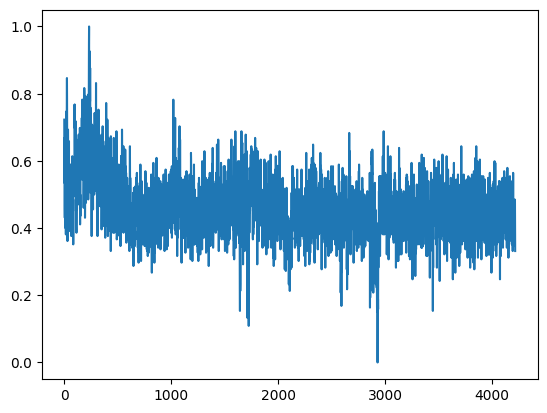

In [ ]:
plt.plot(df_encoded_complete['Total Blocks'])
plt.show()

In [ ]:
option = lacuna_de_dias

if option == 3:
  column_of_choice = 'price_movement_3'
  df_selected_full = df_encoded_complete.drop(['price_movement_7', 'price_movement_14'],axis=1)
elif option == 7:
  column_of_choice = 'price_movement_7'
  df_selected_full = df_encoded_complete.drop(['price_movement_3', 'price_movement_14'],axis=1)
elif option == 14:
  column_of_choice = 'price_movement_14'
  df_selected_full = df_encoded_complete.drop(['price_movement_3', 'price_movement_7'],axis=1)

In [ ]:
df_selected_full = df_selected_full.dropna()

In [ ]:
X_full = df_selected_full.drop([column_of_choice],axis=1)
y_full = df_selected_full[column_of_choice]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#training

kfold = KFold(n_splits=5)

model_svm = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_mlp = MLPClassifier()


result_svm = cross_val_score(model_svm,X_full,y_full,cv = kfold)
result_knn = cross_val_score(model_knn,X_full,y_full,cv = kfold)
result_rf = cross_val_score(model_rf,X_full,y_full,cv = kfold)
result_gb = cross_val_score(model_gb,X_full,y_full,cv = kfold)
result_lr = cross_val_score(model_lr,X_full,y_full,cv = kfold)
result_dt = cross_val_score(model_dt,X_full,y_full,cv = kfold)
result_nb = cross_val_score(model_nb,X_full,y_full,cv = kfold)
result_mlp = cross_val_score(model_mlp,X_full,y_full,cv = kfold)

all_values = [result_svm, result_knn, result_rf, result_gb, result_lr, result_dt, result_nb, result_mlp]

print(f'SVM: {result_svm.mean()}')
print(f'KNN: {result_knn.mean()}')
print(f'Random Forest: {result_rf.mean()}')
print(f'Gradient Boosting: {result_gb.mean()}')
print(f'Logistic Regression: {result_lr.mean()}')
print(f'Decision Tree: {result_dt.mean()}')
print(f'Naive Bayes: {result_nb.mean()}')
print(f'MLP Classifier: {result_mlp.mean()}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


SVM: 0.571107475558404
KNN: 0.5391113322426675
Random Forest: 0.5701376825038089
Gradient Boosting: 0.5725337740972491
Logistic Regression: 0.594821586187898
Decision Tree: 0.4819896780287059
Naive Bayes: 0.4926455954529355
MLP Classifier: 0.5582991797518455


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Final Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the model
model = LogisticRegression(max_iter=500)

# Reduce the hyperparameter grid to speed up testing
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
]


# Configure GridSearch with callback to monitor tests
class PrintGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        i = 1
        def wrapped_candidates(candidate_params):
            nonlocal i
            print(f"Teste {i} em execução...")
            i += 1
            return evaluate_candidates(candidate_params)

        return super()._run_search(wrapped_candidates)

# Run GridSearch
grid_search = PrintGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

# Best hyperparameter combination
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor AUC-ROC nos folds de treino:", grid_search.best_score_)

# Evaluation on the test set
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC no conjunto de teste:", test_auc)


Teste 1 em execução...
Melhores parâmetros: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Melhor AUC-ROC nos folds de treino: 0.7789350325902664
AUC-ROC no conjunto de teste: 0.775894528919158


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the model
model = RandomForestClassifier()

# Reduce the hyperparameter grid to speed up testing
param_grid = [
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
]

# Configure GridSearch with callback to monitor tests
class PrintGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        i = 1
        def wrapped_candidates(candidate_params):
            nonlocal i
            print(f"Teste {i} em execução...")
            i += 1
            return evaluate_candidates(candidate_params)

        return super()._run_search(wrapped_candidates)

# Run GridSearch
grid_search = PrintGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

# Best hyperparameter combination
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor AUC-ROC nos folds de treino:", grid_search.best_score_)

# Evaluation on the test set
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC no conjunto de teste:", test_auc)


Teste 1 em execução...
Melhores parâmetros: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor AUC-ROC nos folds de treino: 0.824034413444455
AUC-ROC no conjunto de teste: 0.8217629266887513


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Define the model
model = MLPClassifier(max_iter=500)

# Reduce the hyperparameter grid to speed up testing
param_grid = [
    {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'lbfgs'],
        'alpha': [0.0001, 0.001],
    }
]

# Configure GridSearch with callback to monitor tests
class PrintGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        i = 1
        def wrapped_candidates(candidate_params):
            nonlocal i
            print(f"Teste {i} em execução...")
            i += 1
            return evaluate_candidates(candidate_params)

        return super()._run_search(wrapped_candidates)

# Run GridSearch
grid_search = PrintGridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

# Best hyperparameter combination
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor AUC-ROC nos folds de treino:", grid_search.best_score_)

# Evaluation on the test set
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)
print("AUC-ROC no conjunto de teste:", test_auc)

Teste 1 em execução...
Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
Melhor AUC-ROC nos folds de treino: 0.82095036675224
AUC-ROC no conjunto de teste: 0.8147620419332936


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#'C': 1, 'penalty': 'l2', 'solver': 'liblinear'
#'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200
#'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'

Pratical Tests - Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

estimator = []
estimator.append(('MLP', MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(50, 50), solver='adam')))
estimator.append(('LGR', LogisticRegression(C = 1, penalty = 'l2',solver = 'liblinear')))
estimator.append(('RFC', RandomForestClassifier(max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)))

# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
#vot_soft = VotingClassifier(estimators = estimator, voting ='soft')

vot_hard.fit(X_train, y_train)
#vot_soft.fit(X_train, y_train)

y_pred_hard = vot_hard.predict(X_test)
#y_pred_soft = vot_soft.predict(X_test)

# using accuracy_score metric to predict accuracy
score_hard_window_acc = accuracy_score(y_test, y_pred_hard)
score_hard_window_precision = precision_score(y_test, y_pred_hard)
score_hard_window_recall = recall_score(y_test, y_pred_hard)
score_hard_window_f1 = f1_score(y_test, y_pred_hard)
#score_soft = accuracy_score(y_test, y_pred_soft)

print(f'Hard voting acc: {score_hard_window_acc}')
print(f'Hard voting precision: {score_hard_window_precision}')
print(f'Hard voting recall: {score_hard_window_recall}')
print(f'Hard voting f1: {score_hard_window_f1}')
#print(f'Soft voting acc: {score_soft}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Hard voting acc: 0.7417061611374408
Hard voting precision: 0.7846364883401921
Hard voting recall: 0.77088948787062
Hard voting f1: 0.7777022433718559


In [ ]:
vot_hard

VotingClassifier(estimators=[('MLP',
                              MLPClassifier(activation='tanh',
                                            hidden_layer_sizes=(50, 50))),
                             ('LGR',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('RFC',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=2,
                                                     n_estimators=200))])

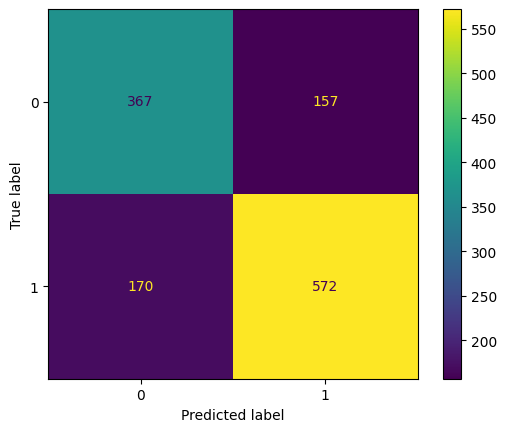

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred_hard)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()